<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Selecionando & Ordenando
Caderno de **Exercícios**<br>
Professor [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)

Aluno: Raul Pichinin

# **Tópicos**

<ol type="1">
  <li>Restrição de colunas;</li>
  <li>Selecionando dados;</li>
  <li>Ordenando e limitando os resultados;</li>
</ol>

---

# **Instruções**

Nessa **atividades**, você deve:

 1. Executar a consulta SQL fornecida;
 2. Exportar os resultados em um arquivo csv para sua máquina;
 3. Renomear o arquivo como **query\<numero-da-query\>.csv**;
 4. Enviar para a avaliação do tutor na plataforma da EBAC.

> **Atenção**: Substitua o **\<numero-da-query>** numero da consulta, exemplo: **query1.csv**.

**Importante**: Para consultar mais detalhes da AWS Athena [clique aqui](https://docs.aws.amazon.com/athena/latest/ug/what-is.html)

---

# Atividades

# **1. Restrição de colunas**

## **1.1. Prática 1**

No módulo 3, vimos um pouco sobre chave primária, chave estrangeira e outras restrições. **Nessa prática 1, não há necessidade de entrega**. No entanto, recomendo que você pratique no site: https://sqliteonline.com/ a seguinte sequência de queries:

* Criando a tabela de clientes:

```sql
CREATE TABLE clientes (
	id_cliente INT PRIMARY KEY);
```

* Inserindo dados nas tabelas de clientes:

```sql
INSERT INTO clientes VALUES(1);
INSERT INTO clientes VALUES(2);
INSERT INTO clientes VALUES(3);
INSERT INTO clientes VALUES(4);
INSERT INTO clientes VALUES(5);
```

* Visualizando dados dos clientes:
```sql
SELECT * FROM clientes;
```

* Criando a tabela de transações:

```sql
CREATE TABLE transacoes (
  id_cliente INT,   
  id_transacao INT PRIMARY KEY,
  data_compra DATE UNIQUE,
  valor FLOAT NOT NULL,
  id_loja varchar(25),
  FOREIGN KEY (id_cliente) REFERENCES clientes(id_cliente)
  CHECK (valor > 0)
);
```

* Inserindo dados na tabela transacoes:

```sql
INSERT INTO transacoes VALUES (1,768805383,2021-06-10,50.74,'magalu');
INSERT INTO transacoes VALUES (2,768805399,2021-06-13,30.90,'giraffas');
INSERT INTO transacoes VALUES (3,818770008,2021-06-05,110.00,'postoshell');
INSERT INTO transacoes VALUES (1,76856563,2021-07-10,2000.90,'magalu');
INSERT INTO transacoes VALUES (1,767573759,2021-06-20,15.70,'subway');
INSERT INTO transacoes VALUES (3,818575758,2021-06-25,2.99,'seveneleven');
INSERT INTO transacoes VALUES (4,764545534,2021-07-11,50.74,'extra');
INSERT INTO transacoes VALUES (5,76766789,2021-08-02,10.00,'subway');
INSERT INTO transacoes VALUES (3,8154567758,2021-08-15,1100.00,'shopee');
```

* Visualizando os dados da tabela transacoes:

```sql
SELECT * FROM transacoes
```

* Verificando o uso do check:

```sql
INSERT INTO transacoes VALUES (5,764545534,2021-07-12,-50.74,'extra');
```


# **2. Selecionando dados**

Nessa segunda prática, utilizaremos o AWS Athena.

O arquivo com os dados a ser utilizado está disponível no material de aula com **transacoes.csv**.

Para criar uma tabela, siga os passos:

1.   No S3-AWS, crie uma nova pasta (bucket) chamada 'bucket-transacoes'
2.   Carregue o arquivo **transacoes.csv** dentro dessa pasta.
3.   Volte para o Athena e execute a seguinte query:

```sql
CREATE EXTERNAL TABLE transacoes(
  id_cliente BIGINT,
  id_transacao BIGINT,
  valor FLOAT,
  id_loja STRING)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
WITH SERDEPROPERTIES ('separatorChar' = ',', 'quoteChar' = '"', 'escapeChar' = '\\')
STORED AS TEXTFILE
LOCATION 's3://bucket-transacoes/'
```

##2.1 Query 1

Visualize os dados e salve os resultados para enviar como exercício:

```sql
SELECT * from transacoes
```

> **Importante**: entregue os resultados da query com o nome *query1.csv*

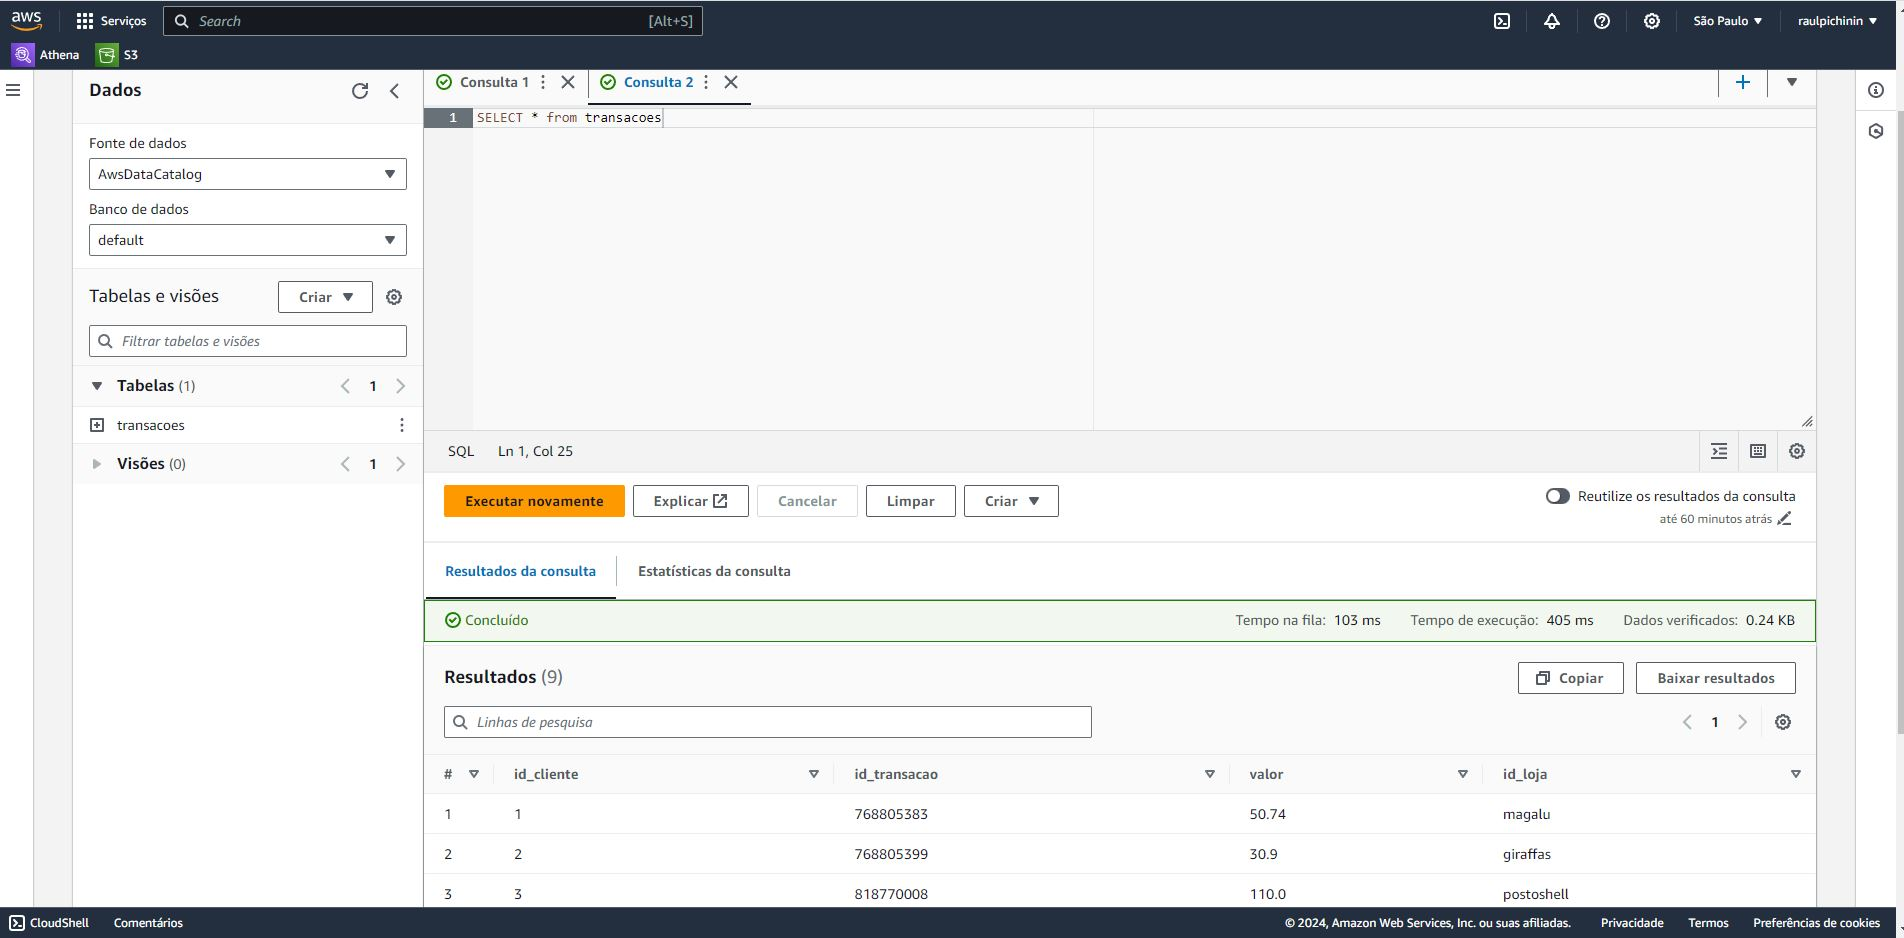

##2.2 Query 2

Agora vamos praticar o uso do alias (apelido) com o comando **AS**. Troque o nome da coluna *id_loja* na visualização por *nome_loja* e salve o resultado como **query2.csv**

```sql
SELECT id_cliente , valor, id_loja AS nome_loja FROM transacoes;
```

> **Importante**: entregue os resultados da query com o nome *query2.csv*

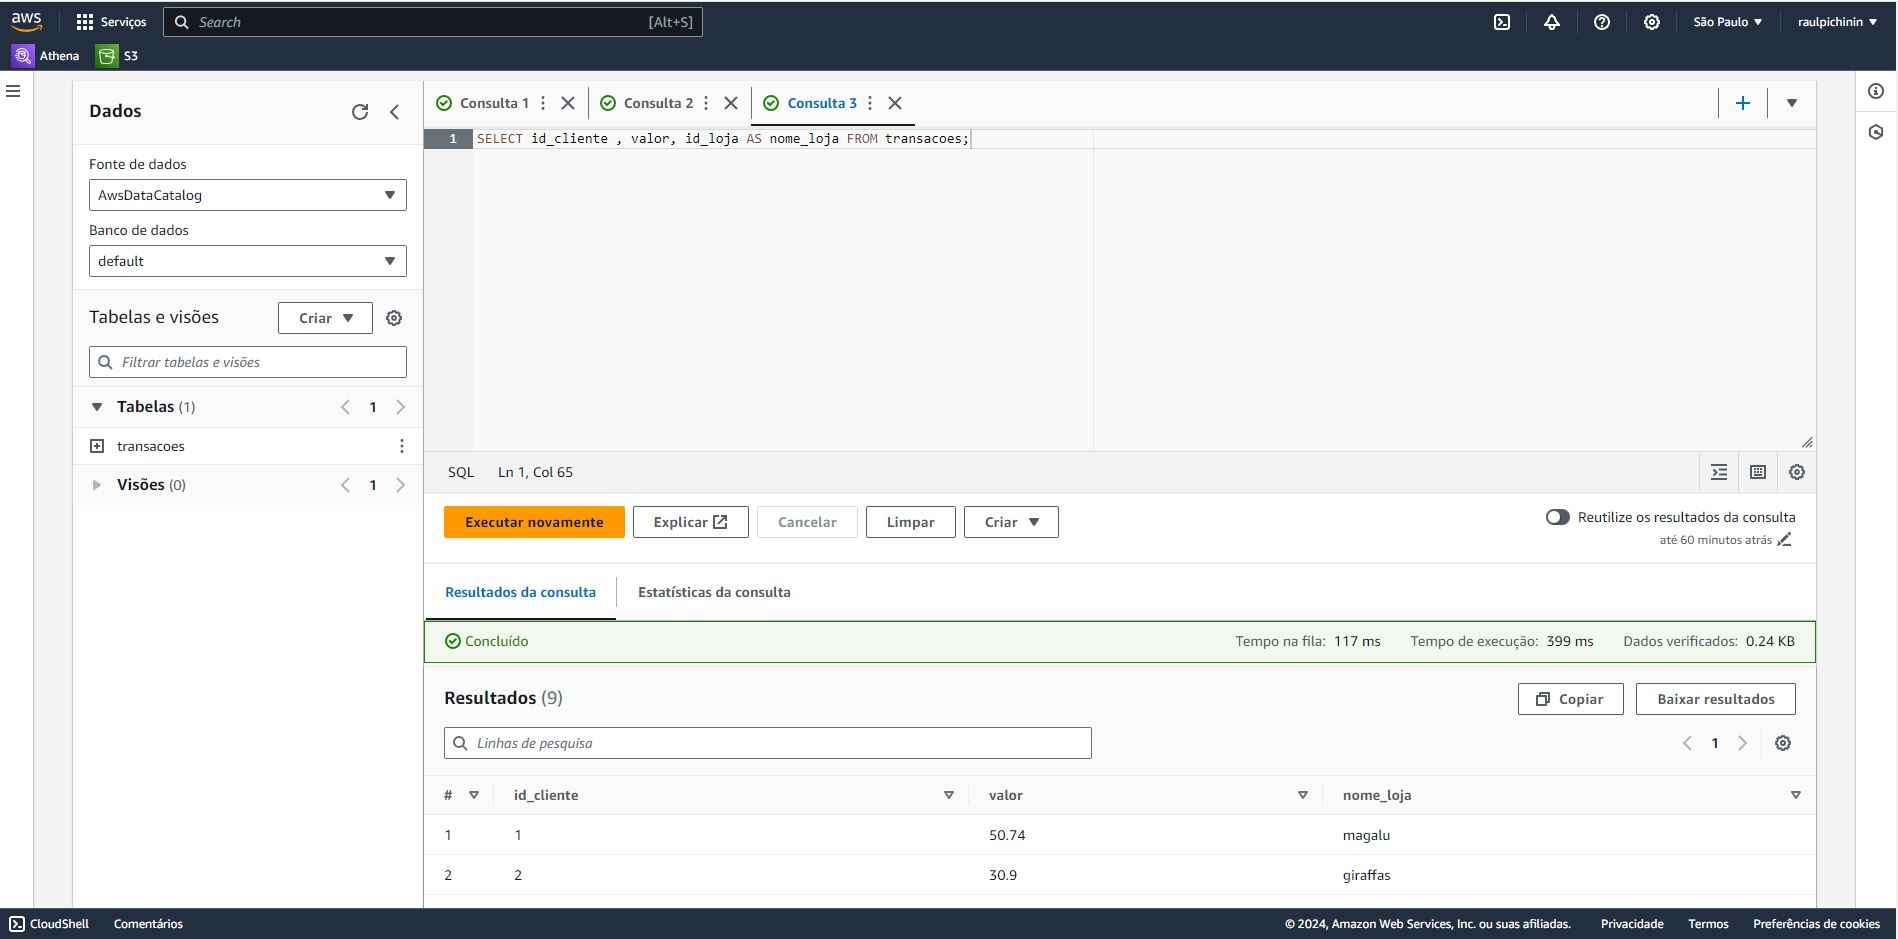

##2.3 Query 3

Para ver as lojas cadastradas na tabela transacoes sem que haja repetições utilize o comando SELECT DISTINCT. Para tal, execute a query abaixo, salve o resultado como **query3.csv**

```sql
SELECT DISTINCT  id_loja AS nome_loja FROM transacoes;
```

> **Importante**: entregue os resultados da query com o nome *query3.csv*

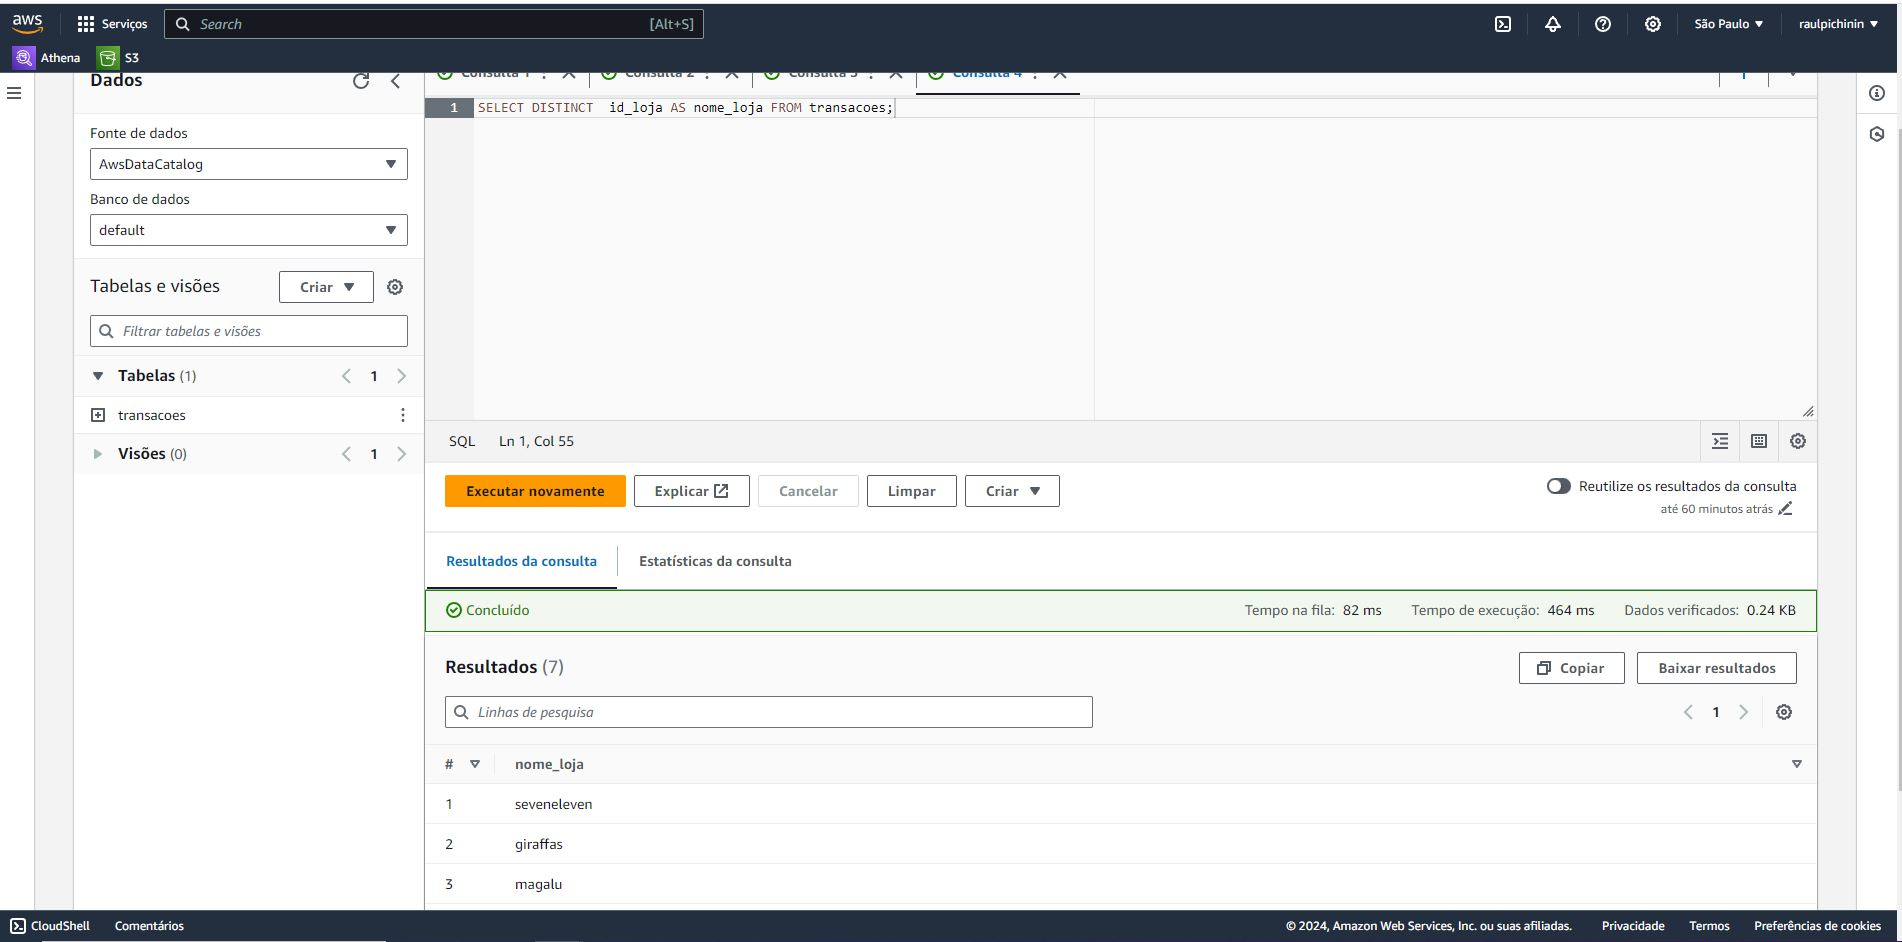

# 3. Ordenando e limitando dados

## 3.1 Query 4

Podemos ordenar e limitar a visualização da tabela como o comando ORDER BY e LIMIT. Execute o comando abaixo e salve os resultados no arquivo **query4.csv**

```sql
SELECT id_cliente, valor FROM transacoes ORDER BY valor DESC LIMIT 2;
```

> **Importante**: entregue os resultados da query com o nome *query4.csv*

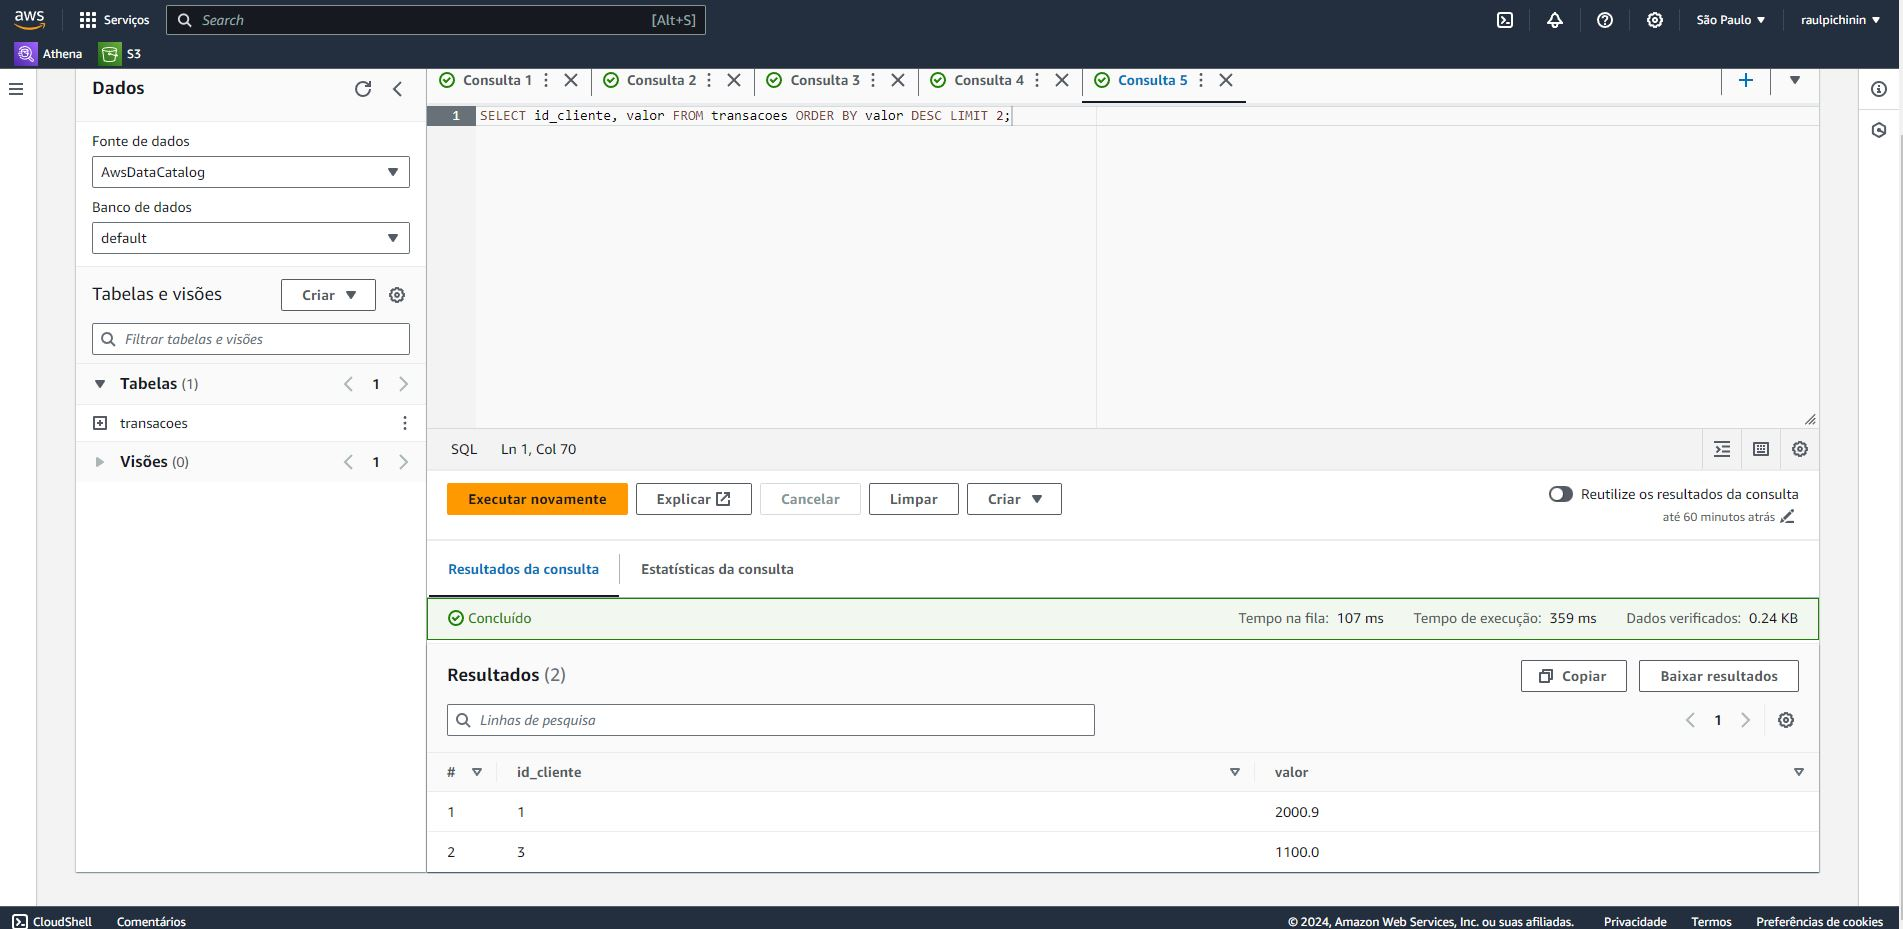